In [ ]:
import kagglehub

path = kagglehub.dataset_download("ealtman2019/ibm-transactions-for-anti-money-laundering-aml")

print("Path to dataset files:", path)

100%|██████████| 7.42G/7.42G [04:39<00:00, 28.5MB/s]  

Extracting files...


Path to dataset files: /Users/andrzej/.cache/kagglehub/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml/versions/7


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [8]:
df = pd.read_csv('/Users/andrzej/python_programs/CODE/data/ibm-transactions-for-anti-money-laundering-aml/HI-Small_Trans.csv')
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [26]:
df.dtypes

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object

In [ ]:
df.isnull().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [30]:
print(sorted(df['Receiving Currency'].unique()) == sorted(df['Payment Currency'].unique()))

True


In [35]:
print(df['Amount Received'].equals(['Amount Paid']))

False


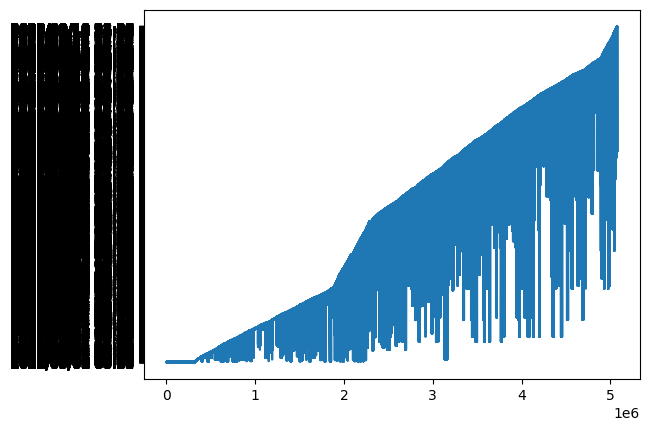

In [43]:
plt.plot(df.index, df['Timestamp'])

RangeIndex(start=0, stop=5078345, step=1)

In [41]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df['Payment Currency'])
one_hot_encoded

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.